In [1]:
"""
Compare word frequencies to log-uniform (sampling model for nce)

Patrick Coady (pcoady@alum.mit.edu)
"""

from wordvector import WordVector
from windowmodel import WindowModel
import docload
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
files = ['../data/adventures_of_sherlock_holmes.txt',
        '../data/hound_of_the_baskervilles.txt',
        '../data/sign_of_the_four.txt']

word_counter, word_list, num_lines, num_words = docload.load_books(
    files, gutenberg=True)

print('Document loaded and processed: {} lines, {} words.'
      .format(num_lines, num_words))

dictionary = docload.build_dict(word_counter)
reverse_dictionary = {v: k for k, v in dictionary.items()}

Document loaded and processed: 24080 lines, 244986 words.


In [3]:
top_words = word_counter.most_common(50000)
top_words.sort(key=lambda t: -t[1])
counts = np.array([t[1] for t in top_words])
counts = counts/sum(counts)  # actual work probability
x = np.array(range(len(counts)))
log_uniform = (np.log(x+2) - np.log(x+1))/np.log(len(counts)+1) # ideal log-uniform

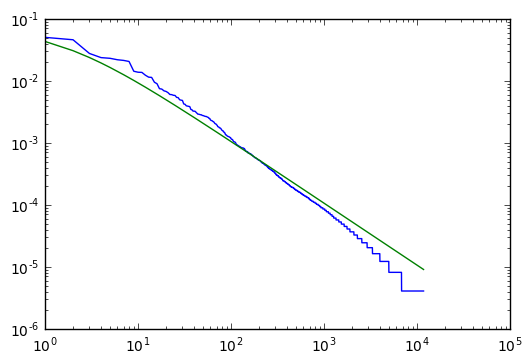

In [6]:
plt.xscale('log')
plt.yscale('log')
plt.plot(x, counts)
plt.plot(x, log_uniform)
plt.show()

# reasonable match, but definitely under-samples first 200 words